In [8]:
import networkx as nx
import numpy as np
from utils import EDGE_ATTR, get_graph, get_weight_stats, plot_weight_stats, naive_sequence, plot_sequence_errors

In [3]:
books = [
    "Cain's Jawbone",
    "Alice's Adventures in Wonderland",
    "Animal Farm",
    "Cloud Atlas",
    "If on a winter's night a traveler",
    "Of Mice and Men",
    "The Alchemist",
    "The Big Sleep",
    "The Maltese Falcon",
    "The Metamorphosis",
    "The Murder of Roger Ackroyd",
    "The Nine Tailors",
    "The Sound and the Fury",
    "The Strange Case of Dr. Jekyll and Mr. Hyde",
]

texts = []
for book in books:
    with open("books/" + book + ".txt", "r", encoding="utf-8") as file:
        texts.append(file.read())

graphs_split = []
for text in texts:
    graphs_split.append(get_graph(text, 100))

graphs_whole = []
for text in texts:
    graphs_whole.append(get_graph(text))

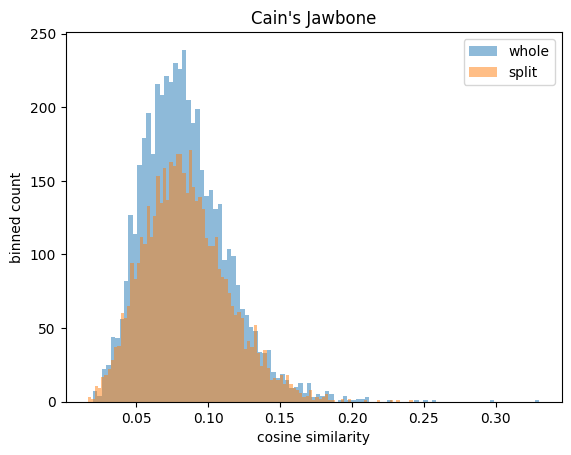

        whole | split
minimum 0.020 | 0.017
mean    0.084 | 0.085
std     0.030 | 0.029
maximum 0.330 | 0.242



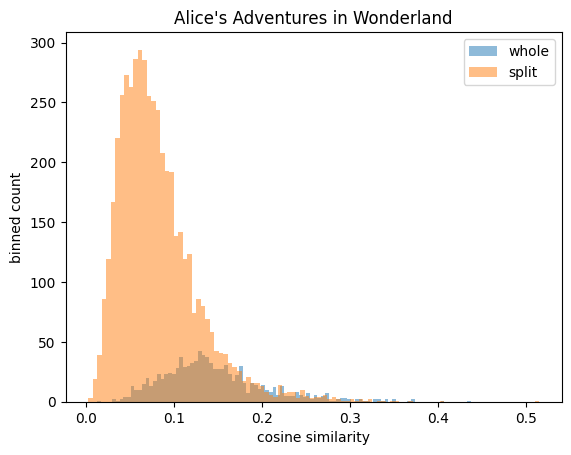

        whole | split
minimum 0.013 | 0.003
mean    0.145 | 0.082
std     0.060 | 0.046
maximum 0.437 | 0.515



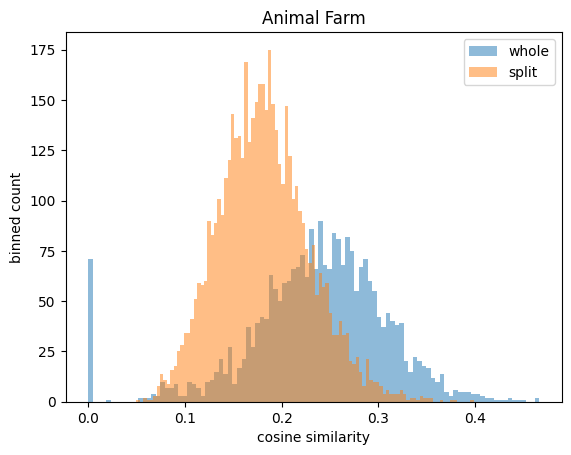

        whole | split
minimum 0.000 | 0.050
mean    0.237 | 0.182
std     0.074 | 0.047
maximum 0.466 | 0.399



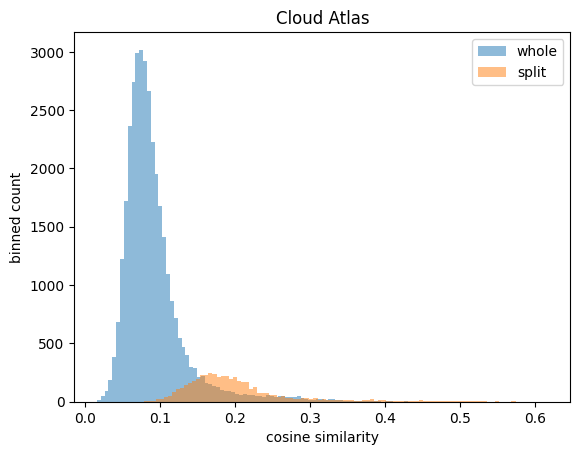

        whole | split
minimum 0.016 | 0.078
mean    0.091 | 0.201
std     0.043 | 0.073
maximum 0.528 | 0.617



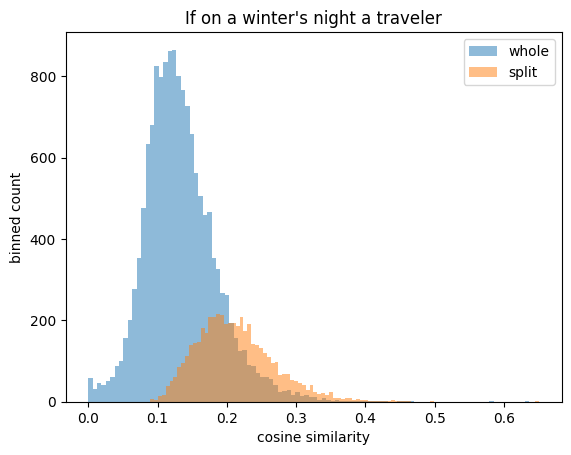

        whole | split
minimum 0.000 | 0.089
mean    0.133 | 0.213
std     0.052 | 0.058
maximum 0.636 | 0.651



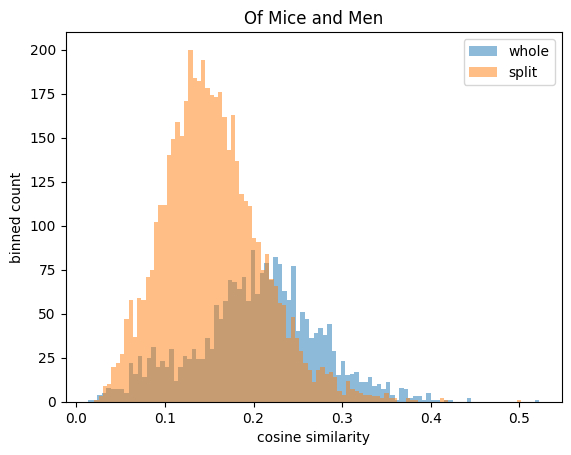

        whole | split
minimum 0.013 | 0.020
mean    0.204 | 0.154
std     0.071 | 0.055
maximum 0.522 | 0.502



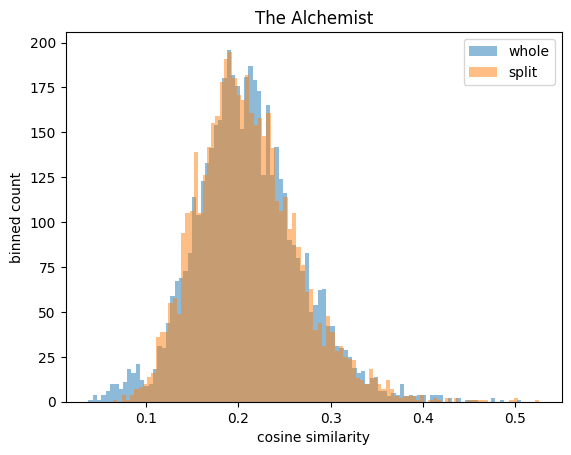

        whole | split
minimum 0.037 | 0.064
mean    0.211 | 0.210
std     0.058 | 0.055
maximum 0.506 | 0.526



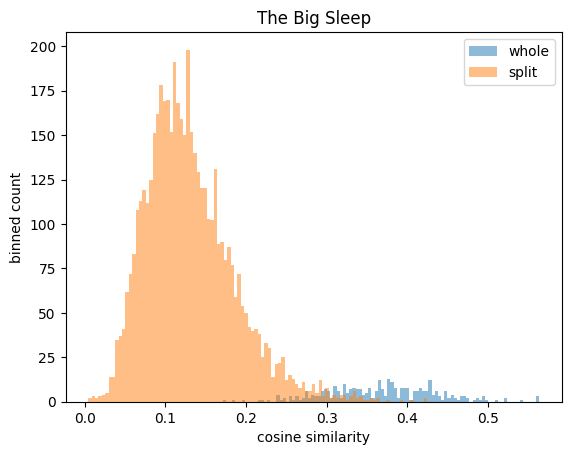

        whole | split
minimum 0.171 | 0.004
mean    0.368 | 0.131
std     0.068 | 0.055
maximum 0.563 | 0.425



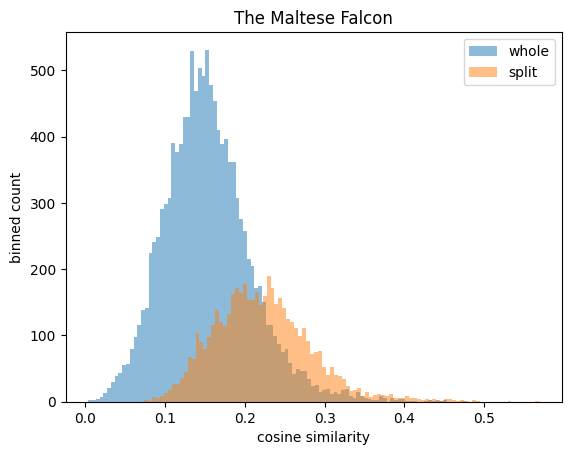

        whole | split
minimum 0.004 | 0.074
mean    0.154 | 0.222
std     0.055 | 0.061
maximum 0.477 | 0.569



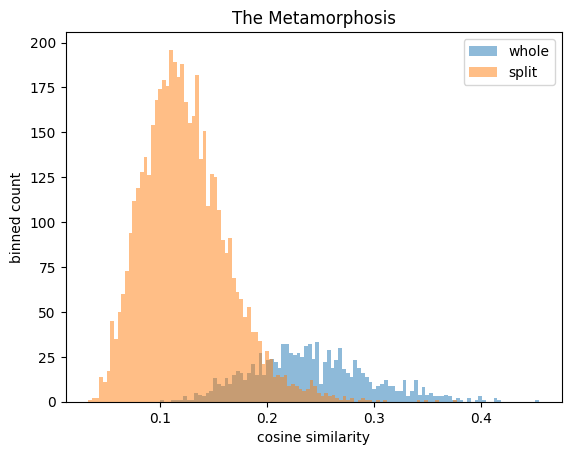

        whole | split
minimum 0.100 | 0.033
mean    0.241 | 0.124
std     0.056 | 0.040
maximum 0.454 | 0.378



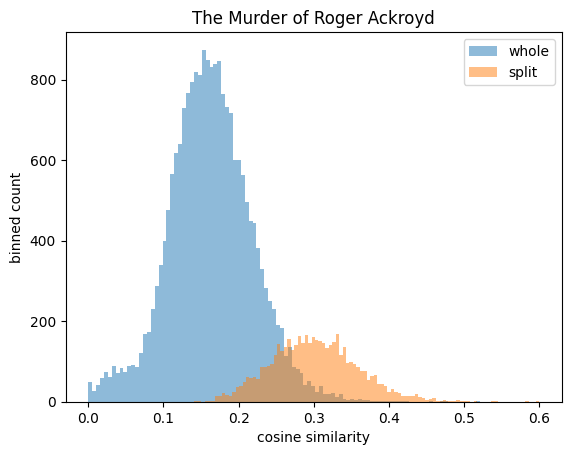

        whole | split
minimum 0.000 | 0.141
mean    0.163 | 0.301
std     0.055 | 0.058
maximum 0.520 | 0.600



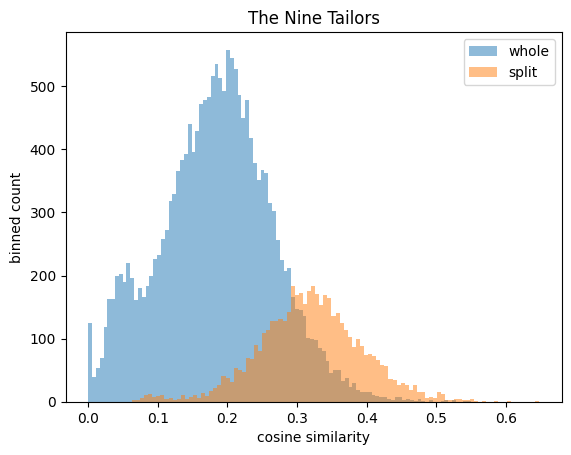

        whole | split
minimum 0.000 | 0.063
mean    0.184 | 0.319
std     0.081 | 0.075
maximum 0.550 | 0.648



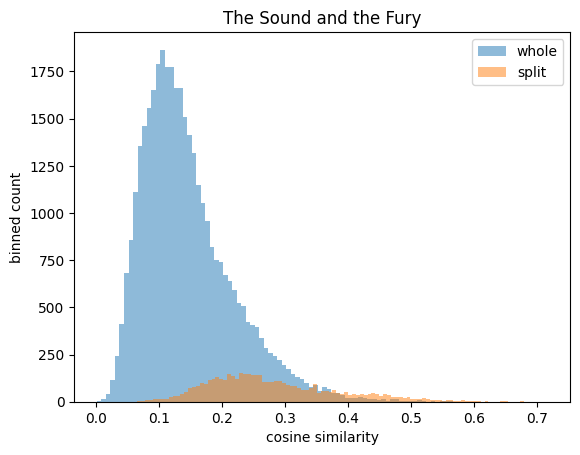

        whole | split
minimum 0.002 | 0.066
mean    0.146 | 0.281
std     0.073 | 0.103
maximum 0.718 | 0.685



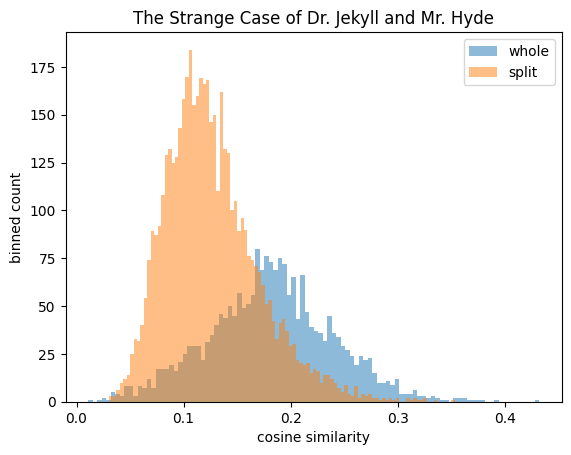

        whole | split
minimum 0.011 | 0.031
mean    0.182 | 0.126
std     0.059 | 0.044
maximum 0.432 | 0.353



In [4]:
for book, graph_whole, graph_split in zip(books, graphs_whole, graphs_split):
    plot_weight_stats(graph_whole, graph_split, book)
    stats_whole = get_weight_stats(graph_whole)
    stats_split = get_weight_stats(graph_split)
    print(f"        whole | split")
    print(f"minimum {stats_whole.min():5.3f} | {stats_split.min():5.3f}")
    print(f"mean    {stats_whole.mean():5.3f} | {stats_split.mean():5.3f}")
    print(f"std     {stats_whole.std():5.3f} | {stats_split.std():5.3f}")
    print(f"maximum {stats_whole.max():5.3f} | {stats_split.max():5.3f}")
    print("")

In [ ]:
narratives = {
    "Cain's Jawbone" : 6,
    "Alice's Adventures in Wonderland" : 1,
    "Animal Farm" : 1,
    "Cloud Atlas" : 6,
    "If on a winter's night a traveler" : 10,
    "Of Mice and Men" : 1,
    "The Alchemist" : 1,
    "The Big Sleep" : 1,
    "The Maltese Falcon" : 1,
    "The Metamorphosis" : 1,
    "The Murder of Roger Ackroyd" : 1,
    "The Nine Tailors" : 1,
    "The Sound and the Fury" : 4,
    "The Strange Case of Dr. Jekyll and Mr. Hyde" : 1,
}

In [16]:
narratives_whole = []
narratives_split = []
for graph_whole, graph_split in zip(graphs_whole, graphs_split):
    narratives_graph_whole = []
    narratives_graph_split = []
    for i in range(100):
        communities_whole = nx.community.louvain_communities(graph_whole, weight=EDGE_ATTR, seed=i)
        communities_split = nx.community.louvain_communities(graph_split, weight=EDGE_ATTR, seed=i)
        narratives_graph_whole.append(len(communities_whole))
        narratives_graph_split.append(len(communities_split))
    narratives_whole.append(np.array(narratives_graph_whole).mean())
    narratives_split.append(np.array(narratives_graph_split).mean())

print("expected | whole | split | book")
for book, whole, split in zip(books, narratives_whole, narratives_split):
    print(f"{narratives[book]:8d} | {whole:5.1f} | {split:5.1f} | {book}")

expected | whole | split | book
       6 |   3.1 |   3.3 | Cain's Jawbone
       1 |   3.0 |   5.5 | Alice's Adventures in Wonderland
       1 |   4.4 |   4.3 | Animal Farm
       6 |   5.0 |   4.0 | Cloud Atlas
      10 |   3.6 |   2.8 | If on a winter's night a traveler
       1 |   3.6 |   3.1 | Of Mice and Men
       1 |   3.0 |   3.1 | The Alchemist
       1 |   2.4 |   3.6 | The Big Sleep
       1 |   4.0 |   3.9 | The Maltese Falcon
       1 |   3.0 |   4.3 | The Metamorphosis
       1 |   4.3 |   3.6 | The Murder of Roger Ackroyd
       1 |   3.6 |   2.5 | The Nine Tailors
       4 |   3.0 |   2.0 | The Sound and the Fury
       1 |   2.1 |   3.0 | The Strange Case of Dr. Jekyll and Mr. Hyde


In [6]:
sequences_whole = [naive_sequence(graph, 0) for graph in graphs_whole]
sequences_split = [naive_sequence(graph, 0) for graph in graphs_split]

for book, whole, split in zip(books, sequences_whole, sequences_split):
    print(book)
    print(*whole, sep=", ")
    print(*split, sep=", ")
    print("")

Cain's Jawbone
0, 88, 45, 87, 38, 33, 75, 27, 32, 90, 58, 85, 8, 24, 99, 76, 78, 21, 10, 71, 61, 2, 97, 1, 53, 63, 18, 31, 86, 79, 52, 25, 91, 95, 65, 39, 28, 34, 74, 35, 69, 49, 14, 46, 41, 12, 57, 48, 68, 98, 36, 55, 84, 81, 16, 42, 47, 13, 9, 17, 92, 40, 11, 73, 44, 77, 80, 23, 82, 67, 4, 7, 66, 54, 22, 5, 70, 19, 59, 94, 6, 26, 3, 20, 30, 89, 64, 51, 56, 96, 62, 43, 93, 15, 60, 72, 29, 37, 83, 50
0, 21, 78, 10, 45, 38, 87, 75, 33, 55, 36, 68, 32, 90, 58, 85, 8, 98, 24, 77, 44, 92, 40, 76, 1, 62, 39, 25, 34, 74, 81, 89, 64, 88, 52, 79, 27, 14, 49, 69, 35, 48, 86, 31, 53, 54, 22, 97, 2, 46, 41, 11, 7, 66, 13, 47, 18, 63, 59, 17, 96, 71, 61, 57, 73, 70, 99, 16, 42, 82, 12, 93, 30, 20, 28, 95, 84, 23, 80, 4, 67, 83, 9, 56, 51, 19, 91, 43, 5, 15, 65, 50, 26, 6, 94, 3, 60, 29, 37, 72

Alice's Adventures in Wonderland
0, 44, 26, 23, 22, 24, 8, 6, 3, 33, 1, 2, 7, 16, 17, 18, 20, 19, 37, 29, 30, 36, 35, 38, 34, 39, 41, 40, 42, 43, 32, 31, 11, 9, 15, 10, 13, 12, 4, 5, 21, 28, 27, 14, 25
0, 9

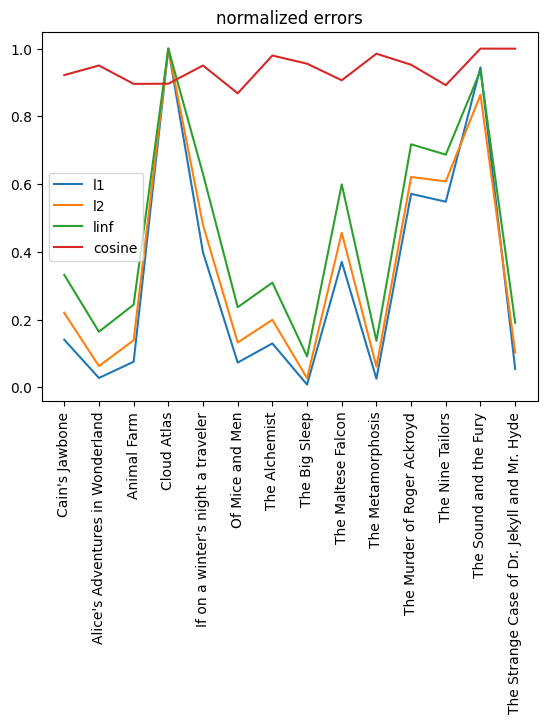

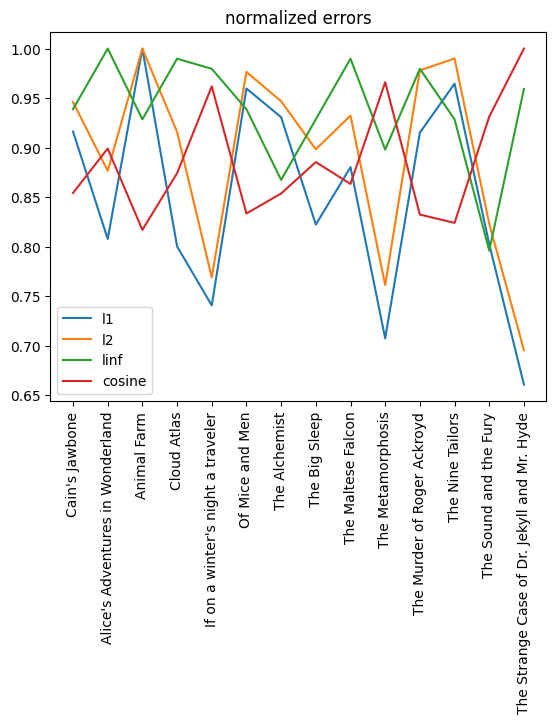

In [7]:
plot_sequence_errors(books, sequences_whole)
plot_sequence_errors(books, sequences_split)